In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from env import get_db_url
import acquire

In [2]:
zillow = acquire.get_data_from_sql()
zillow.head()

,parcelid,bathrooms,bedrooms,square_feet,fips,value,tax_amount
0,11289917,2.0,3.0,1458.0,6037.0,136104.0,2319.90
1,11705026,1.0,2.0,1421.0,6037.0,35606.0,543.69
2,14269464,3.0,4.0,2541.0,6059.0,880456.0,9819.72
3,11389003,2.0,3.0,1650.0,6037.0,614000.0,7673.19
4,11967869,1.0,2.0,693.0,6037.0,274237.0,3267.47


In [3]:
zillow.fips.value_counts()

6037.0    9630
6059.0    4109
6111.0    1297
Name: fips, dtype: int64

In [4]:
zillow['county'] = np.where(zillow.fips == 6037, 'Los_Angeles',
                           np.where(zillow.fips == 6059, 'Orange', 
                                   'Ventura'))
zillow['state'] = 'CA'
zillow.head()

,parcelid,bathrooms,bedrooms,square_feet,fips,value,tax_amount,county,state
0,11289917,2.0,3.0,1458.0,6037.0,136104.0,2319.90,Los_Angeles,CA
1,11705026,1.0,2.0,1421.0,6037.0,35606.0,543.69,Los_Angeles,CA
2,14269464,3.0,4.0,2541.0,6059.0,880456.0,9819.72,Orange,CA
3,11389003,2.0,3.0,1650.0,6037.0,614000.0,7673.19,Los_Angeles,CA
4,11967869,1.0,2.0,693.0,6037.0,274237.0,3267.47,Los_Angeles,CA


In [5]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Data columns (total 9 columns):
parcelid       15036 non-null int64
bathrooms      15036 non-null float64
bedrooms       15036 non-null float64
square_feet    15012 non-null float64
fips           15036 non-null float64
value          15036 non-null float64
tax_amount     15035 non-null float64
county         15036 non-null object
state          15036 non-null object
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB


In [6]:
zillow.bathrooms.value_counts()

2.0     6182
3.0     3114
1.0     2652
2.5     1155
4.0      671
3.5      302
1.5      240
5.0      233
4.5      217
6.0      102
5.5       65
0.0       40
7.0       25
6.5       15
8.0       14
7.5        4
9.0        3
11.0       1
10.0       1
Name: bathrooms, dtype: int64

In [7]:
zillow.bedrooms.value_counts()

3.0     6668
4.0     4423
2.0     2350
5.0     1158
6.0      183
1.0      177
0.0       42
7.0       27
12.0       3
9.0        2
11.0       1
10.0       1
8.0        1
Name: bedrooms, dtype: int64

In [8]:
# Drop all null values
zillow = zillow.dropna(how='any',axis=0)
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15011 entries, 0 to 15035
Data columns (total 9 columns):
parcelid       15011 non-null int64
bathrooms      15011 non-null float64
bedrooms       15011 non-null float64
square_feet    15011 non-null float64
fips           15011 non-null float64
value          15011 non-null float64
tax_amount     15011 non-null float64
county         15011 non-null object
state          15011 non-null object
dtypes: float64(6), int64(1), object(2)
memory usage: 1.1+ MB


In [9]:
# Drop all values of 0
zillow = zillow[zillow.bathrooms != 0]
zillow = zillow[zillow.bedrooms != 0]
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14989 entries, 0 to 15035
Data columns (total 9 columns):
parcelid       14989 non-null int64
bathrooms      14989 non-null float64
bedrooms       14989 non-null float64
square_feet    14989 non-null float64
fips           14989 non-null float64
value          14989 non-null float64
tax_amount     14989 non-null float64
county         14989 non-null object
state          14989 non-null object
dtypes: float64(6), int64(1), object(2)
memory usage: 1.1+ MB


In [10]:
# Drop fips column
zillow = zillow.drop(columns='fips')
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14989 entries, 0 to 15035
Data columns (total 8 columns):
parcelid       14989 non-null int64
bathrooms      14989 non-null float64
bedrooms       14989 non-null float64
square_feet    14989 non-null float64
value          14989 non-null float64
tax_amount     14989 non-null float64
county         14989 non-null object
state          14989 non-null object
dtypes: float64(5), int64(1), object(2)
memory usage: 1.0+ MB


In [11]:
# make parcelid the index
zillow = zillow.set_index('parcelid')

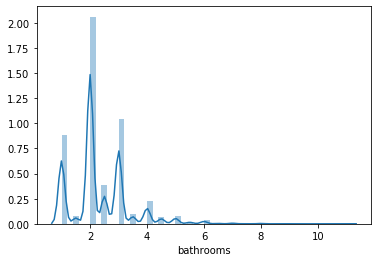

In [12]:
# Plot distributions of all variables
sns.distplot(zillow.bathrooms)

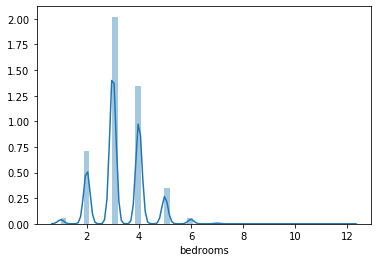

In [13]:
sns.distplot(zillow.bedrooms)

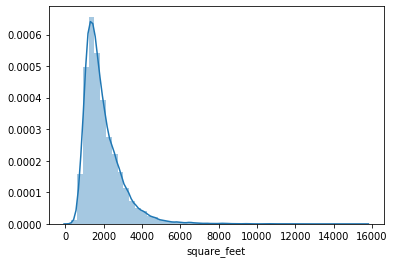

In [14]:
sns.distplot(zillow.square_feet)

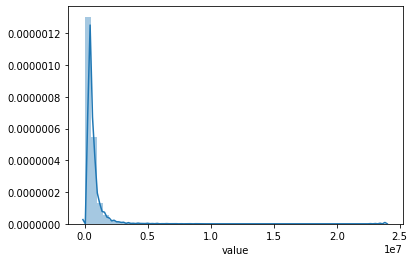

In [15]:
sns.distplot(zillow.value)

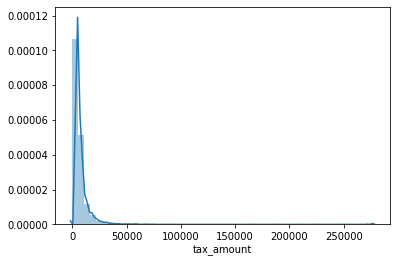

In [16]:
sns.distplot(zillow.tax_amount)

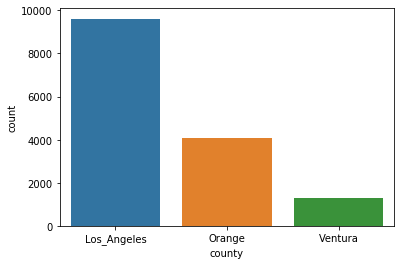

In [17]:
sns.countplot(zillow.county)

In [18]:
zillow.head()

,bathrooms,bedrooms,square_feet,value,tax_amount,county,state
parcelid,,,,,,,
11289917,2.0,3.0,1458.0,136104.0,2319.90,Los_Angeles,CA
11705026,1.0,2.0,1421.0,35606.0,543.69,Los_Angeles,CA
14269464,3.0,4.0,2541.0,880456.0,9819.72,Orange,CA
11389003,2.0,3.0,1650.0,614000.0,7673.19,Los_Angeles,CA
11967869,1.0,2.0,693.0,274237.0,3267.47,Los_Angeles,CA


In [19]:
zillow['tax_rate'] = zillow.tax_amount / zillow.value

In [31]:
zillow.groupby('county').tax_rate.agg(['count', 'mean', 'median', 'max'])

,count,mean,median,max
county,,,,
Los_Angeles,9604,0.014173,0.012634,0.452884
Orange,4094,0.012121,0.011524,0.107350
Ventura,1291,0.012054,0.011249,0.294865


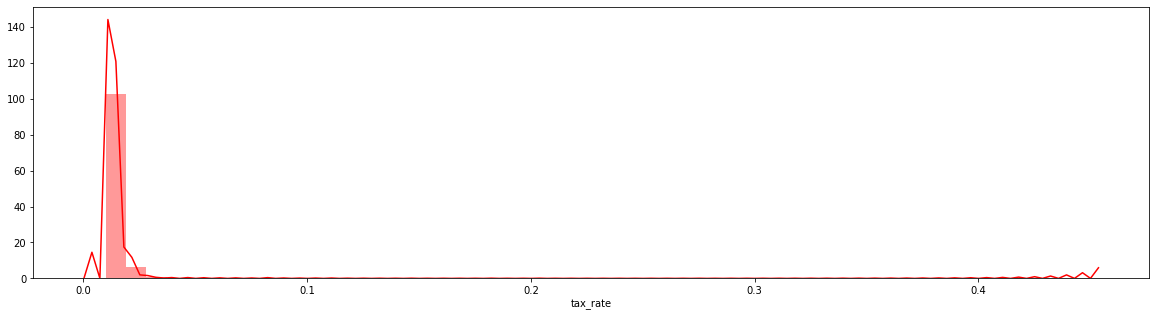

In [20]:
# Show distribution of tax rates for each county
plt.figure(figsize=(20,5))
sns.distplot(zillow[zillow.county == 'Los_Angeles'].tax_rate, color='red')

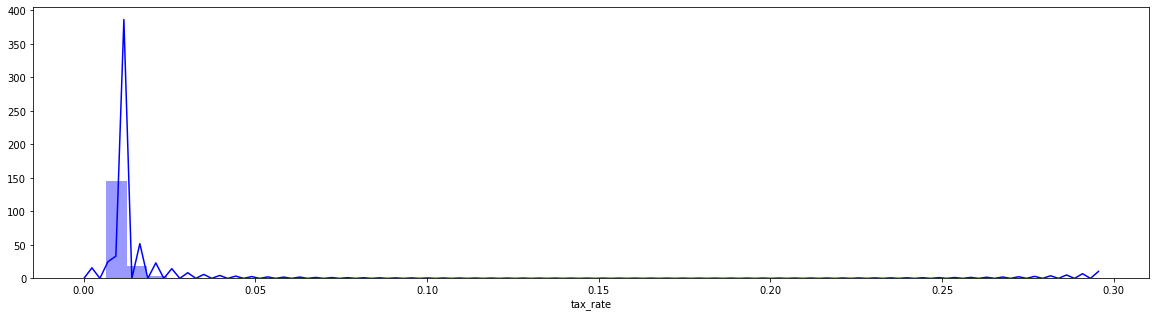

In [21]:
plt.figure(figsize=(20,5))
sns.distplot(zillow[zillow.county == 'Ventura'].tax_rate, color='blue')

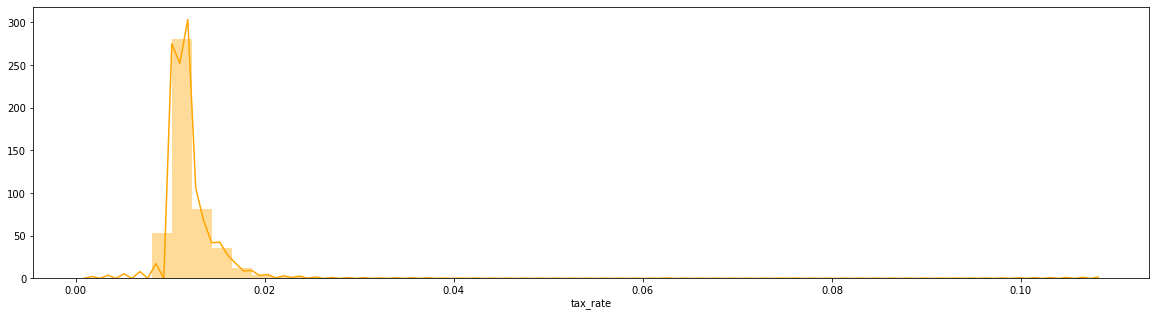

In [22]:
plt.figure(figsize=(20,5))
sns.distplot(zillow[zillow.county == 'Orange'].tax_rate, color='orange')

In [23]:
# Save dataframe as csv
zillow_df = acquire.wrangle_zillow()
zillow_df.to_csv('zillow.csv')